In [1]:
import os
#Open the H5 file in read mode
path = 'data/text_file/'
file = os.listdir(path)
file

['2024.07.29.09h46m45s_process.h5.txt',
 '2024.07.29.10h10m45s_process.h5.txt',
 '2024.07.29.10h34m45s_process.h5.txt',
 '2024.07.29.10h58m45s_process.h5.txt',
 '2024.07.29.11h22m45s_process.h5.txt',
 '2024.07.29.11h46m45s_process.h5.txt']

In [2]:
import pandas as pd
dfs = []
for f in file:
    dfs.append(pd.read_csv(path+f, sep='\t', encoding_errors='ignore'))
    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(37994, 402)


,time,(2 Th),(3 Th),(4 Th),(5 Th),(6 Th),(7 Th),(8 Th),(9 Th),(10 Th),...,RG monitor [V],RG current limit flag,RB target [V],RB monitor [V],RB current limit flag,5CHV Board A temp monitor [C],update time [s],total SDO read errors,failed HTTP GET count,Unnamed: 401
0,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.219,0,700,700.75,0,31.12,0.125,0,0,NaN
1,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
2,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
3,2024-07-29 09:46:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
4,2024-07-29 09:46:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN


In [ ]:
len()

In [3]:
# preprocessing as done in p1
df = df.iloc[:,:315]

df['time'] = df['time'].apply(lambda x : x.split(' ')[1]) # index is set to time [s]
df = df.groupby('time')[df.columns[1:]].mean().reset_index()
df = df.drop(columns=['time'])

df.index.name = 'time'
df.columns = range(2, 316) # (2 Th) -> 2
df.head()

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# add a column for total intensity at each time step
df['sum'] = df.sum(axis=1)

# save the original one in case
df_original = df.copy()

,2,3,4,5,6,7,8,9,10,11,...,307,308,309,310,311,312,313,314,315,sum
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
# in terms of percentage [%]
for i in range(len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i] / df['sum'] * 100
df.head()

,2,3,4,5,6,7,8,9,10,11,...,307,308,309,310,311,312,313,314,315,sum
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [7]:
# drop the sum column
df = df.drop(columns=['sum'])
df.head()

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


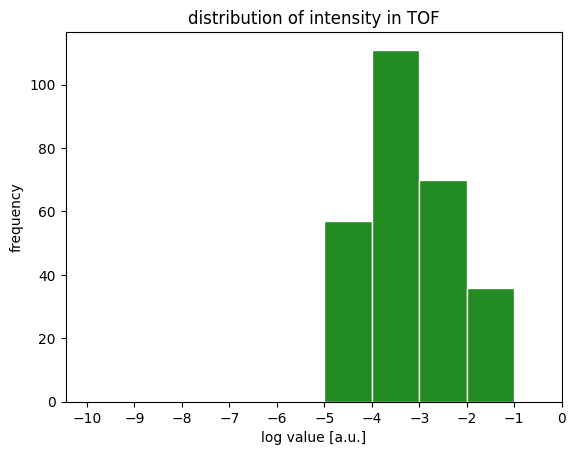

In [8]:
# find max values in respective columns
max_val = []
for i in range(len(df.columns)):
    max_val.append(df.iloc[:,i].max())
df_max = pd.DataFrame({'raw':max_val}, index=range(2,316)) # (2 Th) -> 2

import matplotlib.pyplot as plt
import numpy as np

plt.hist(np.log(df_max['raw']), edgecolor='w', bins=np.arange(-10,0,1), color='forestgreen')
plt.xticks(np.arange(-10,1,1))
plt.xlabel('log value [a.u.]')
plt.ylabel('frequency')
plt.title('distribution of intensity in TOF')
plt.show()

In [22]:
# add log column
df_max['log'] = df_max['raw'].apply(lambda x:np.log(x))

# add category labels
df_max.loc[:,'category'] = pd.cut(df_max['log'], bins=np.arange(-5,6,1), labels=np.arange(-5,5,1), right=False)
df_max

C:\Users\syj43\AppData\Local\Temp\ipykernel_17580\3389656202.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1, 0, 1, 0, 1, ..., 4, 4, 4, 2, 2]
Length: 314
Categories (10, int32): [-5 < -4 < -3 < -2 ... 1 < 2 < 3 < 4]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_max.loc[:,'category'] = pd.cut(df_max['log'], bins=np.arange(-5,6,1), labels=np.arange(-5,5,1), right=False)


,raw,log,category
mass,,,
32,2.822052,1.037464,1
15,1.920336,0.652500,0
85,6.481446,1.868944,1
38,1.309971,0.270005,0
36,3.600486,1.281069,1
...,...,...,...
18,74.198804,4.306748,4
28,61.992279,4.127010,4
40,97.310823,4.577910,4


In [13]:
print(df_max['log'].min(), df_max['log'].max())

-4.870622402946362 4.577910212499602


In [25]:
df_max['category'].unique()

[1, 0, -1, -2, -3, -4, -5, 3, 4, 2]
Categories (10, int32): [-5 < -4 < -3 < -2 ... 1 < 2 < 3 < 4]

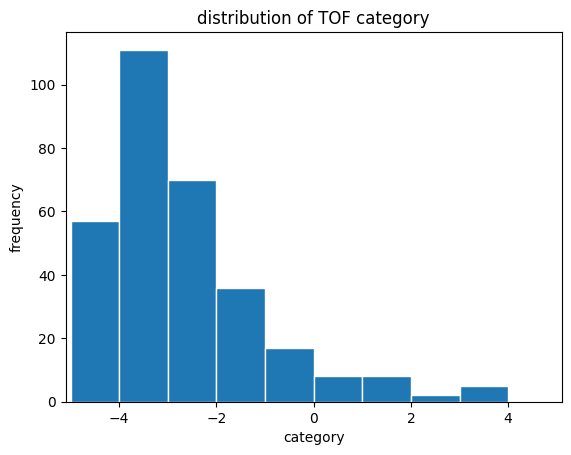

In [29]:
plt.hist(df_max['category'], edgecolor='w', bins=np.arange(-5,5,1))
# plt.xticks(np.arange(-10,1,1))
plt.xlabel('category')
plt.xlim(-5.1,5.1)
plt.ylabel('frequency')
plt.title('distribution of TOF category')
plt.show()

In [30]:
# sort mol mass by category
df_max.index.name = 'mass'
df_max = df_max.sort_values(by='category', ascending=False)
df_max

,raw,log,category
mass,,,
40,97.310823,4.577910,4
28,61.992279,4.127010,4
18,74.198804,4.306748,4
17,40.976641,3.713002,3
16,26.619794,3.281655,3
...,...,...,...
209,0.013810,-4.282378,-5
285,0.013479,-4.306616,-5
284,0.013163,-4.330318,-5


In [91]:
category_mass = [] # Ar shows the highest value
for i in np.arange(4,-5,-1):
    category_mass.append(list(df_max[df_max['category']==i].index))
print(len(category_mass))
category_mass[:6]

9


[[40, 28, 18],
 [17, 16],
 [98, 63],
 [65, 135, 133, 32, 30, 100, 36, 85],
 [19, 14, 116, 114, 20, 15, 35, 38],
 [101, 102, 27, 29, 21, 64, 42, 47, 99, 170, 82, 43, 44, 41, 39, 37, 137]]

In [95]:
n_elem = []
for i in category_mass:
    n_elem.append(len(i))
n_elem 

[3, 2, 2, 8, 8, 17, 36, 70, 111]

In [38]:
# generate random colors
import random

number_of_colors = len(category_mass)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

cate_colors = []
flag = 0
for i in category_mass:
    for j in range(len(i)):
        cate_colors.append(color[flag])
    flag += 1

['#D58B0E', '#4F66B9', '#07D2D2', '#7DA05B', '#C60F5B', '#6C747B', '#F0D4DC', '#690CF3', '#7F9768']


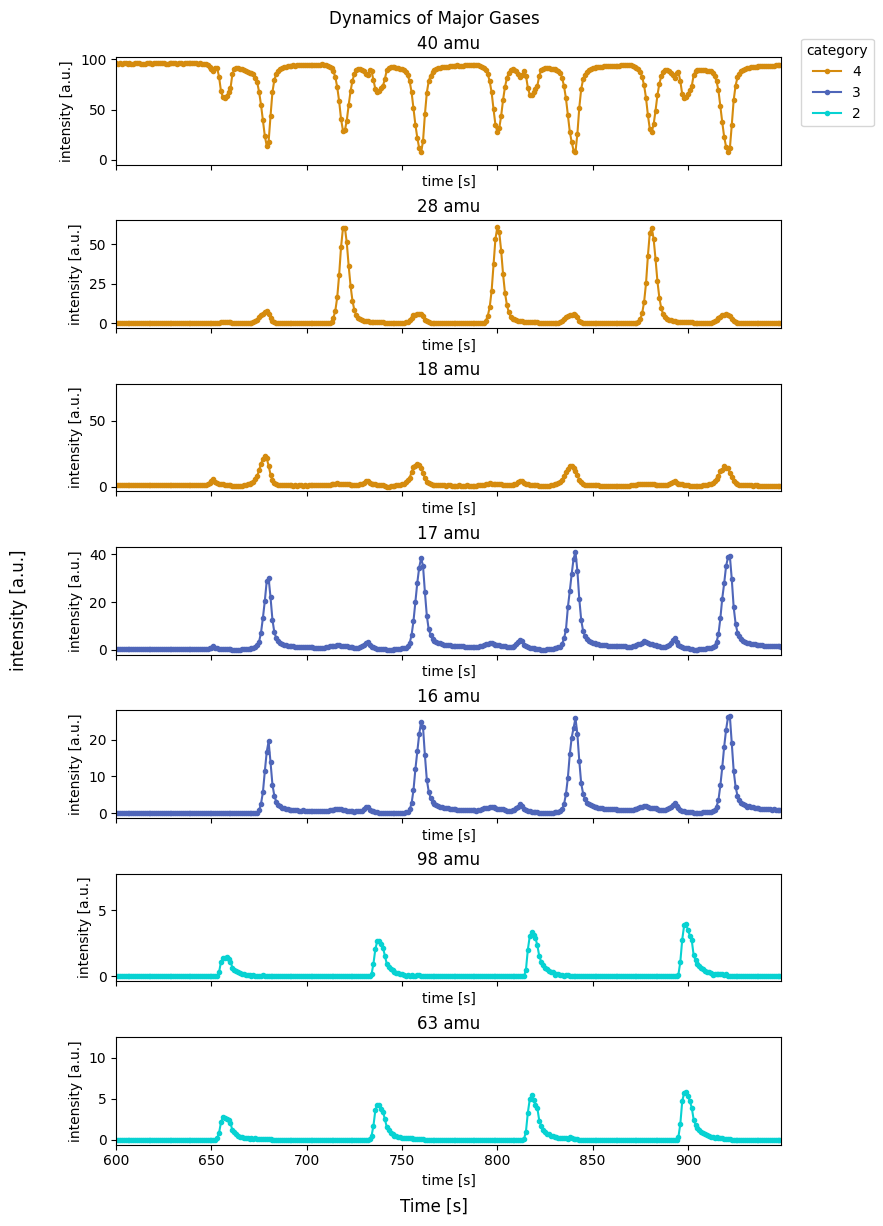

In [66]:
import itertools

category_to_plot = list(itertools.chain(*category_mass[:3]))
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,12))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    if idx not in [0, 3, 5, 7, 15, 23]:
        axs[idx].plot(df.loc[:,val],'.-',color=cate_colors[idx], label='_nolegend_')
    else:
        axs[idx].plot(df.loc[:,val],'.-',color=cate_colors[idx])
    axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle('Dynamics of Major Gases', y=1)
# fig.legend(np.arange(4,-6,-1), title='category', bbox_to_anchor=(0.95,0.982), loc='upper left')
plt.show()

# fig.savefig('image/dynamics_major_percentage.png', bbox_inches='tight')

C:\Users\syj43\AppData\Local\Temp\ipykernel_17580\29151121.py:4: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout(pad=3)


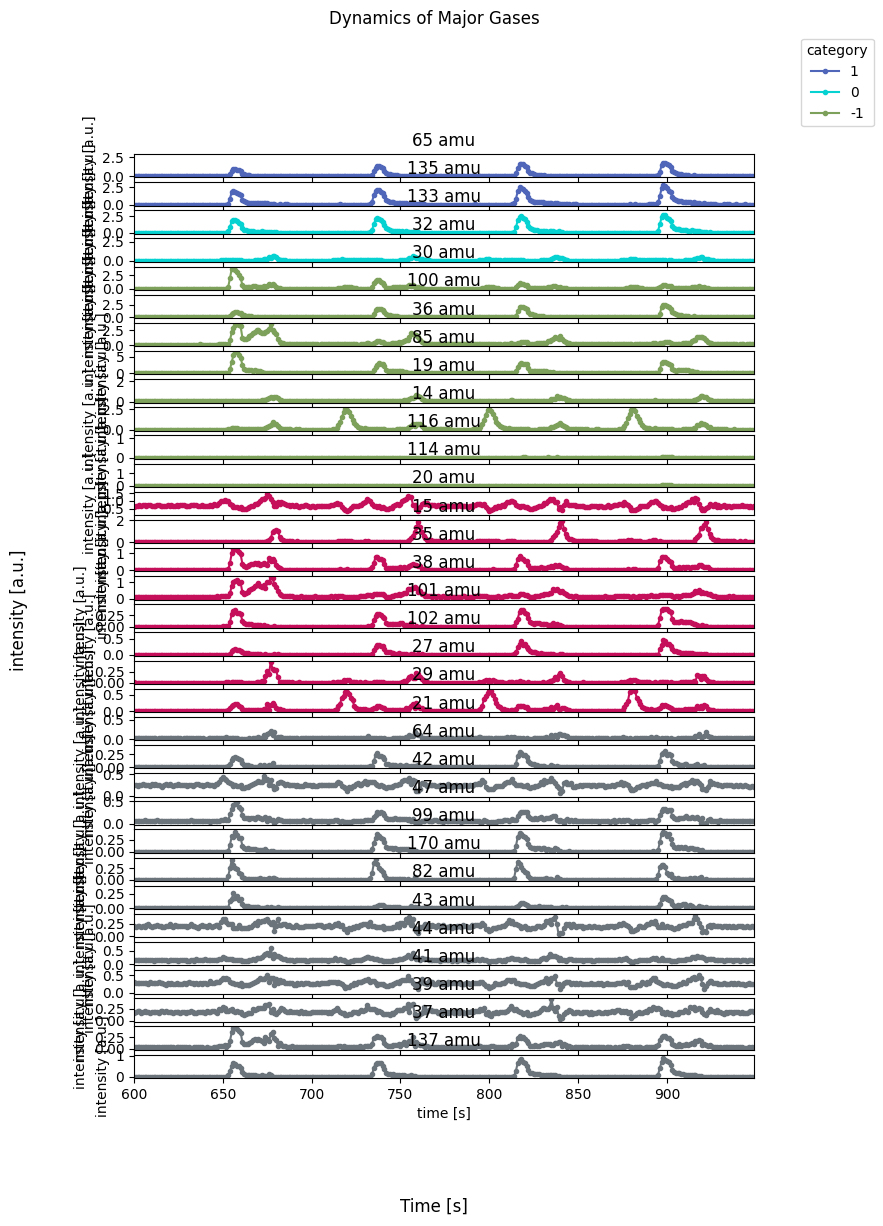

In [73]:
cursor = 3
category_to_plot = list(itertools.chain(*category_mass[cursor:cursor+3]))
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,12))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    if idx not in [0, 3, 5, 7, 15, 23]:
        axs[idx].plot(df.loc[:,val],'.-',color=cate_colors[cursor+idx], label='_nolegend_')
    else:
        axs[idx].plot(df.loc[:,val],'.-',color=cate_colors[cursor+idx])
    axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle('Dynamics of Major Gases', y=1)
fig.legend(np.arange(1,-2,-1), title='category', bbox_to_anchor=(0.95,0.982), loc='upper left')
plt.show()

In [76]:
category_mass[3]

[65, 135, 133, 32, 30, 100, 36, 85]

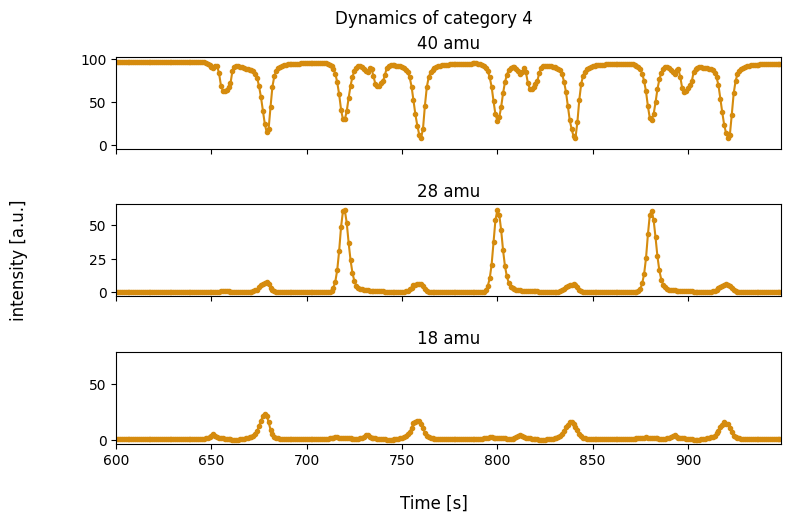

In [131]:
target_index= 0
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,5))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=cate_colors[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
# fig.legend(np.arange(1,-2,-1), title='category', bbox_to_anchor=(0.95,0.982), loc='upper left')
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

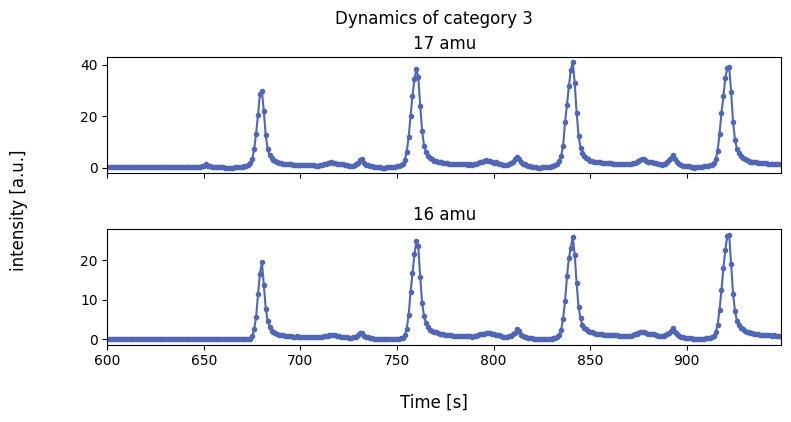

In [132]:
target_index= 1
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,4))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=color[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

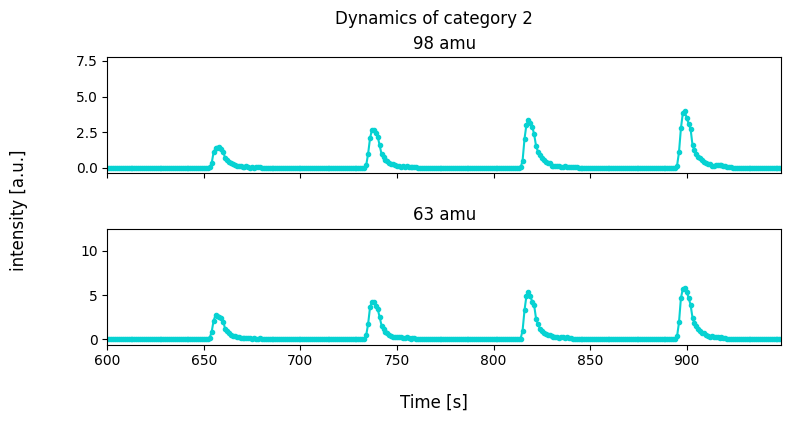

In [133]:
target_index= 2
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,4))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=color[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

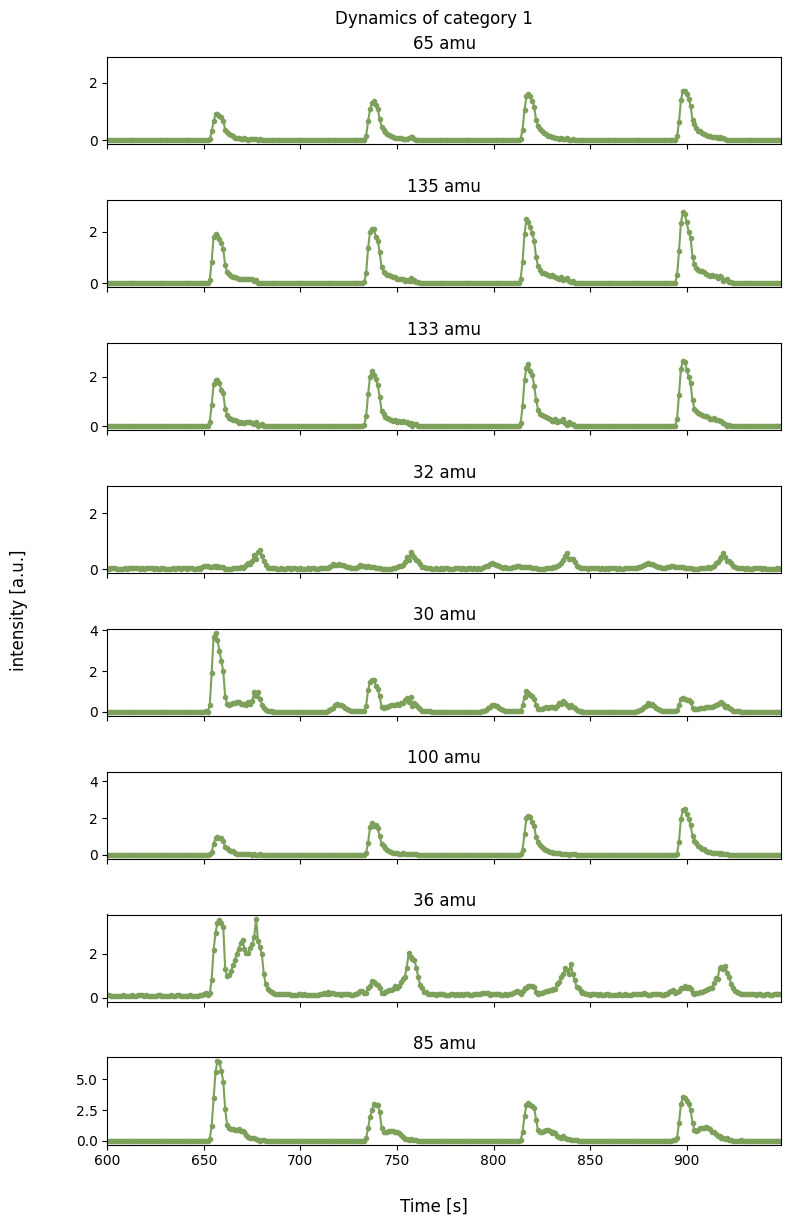

In [136]:
target_index= 3
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,12))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=color[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

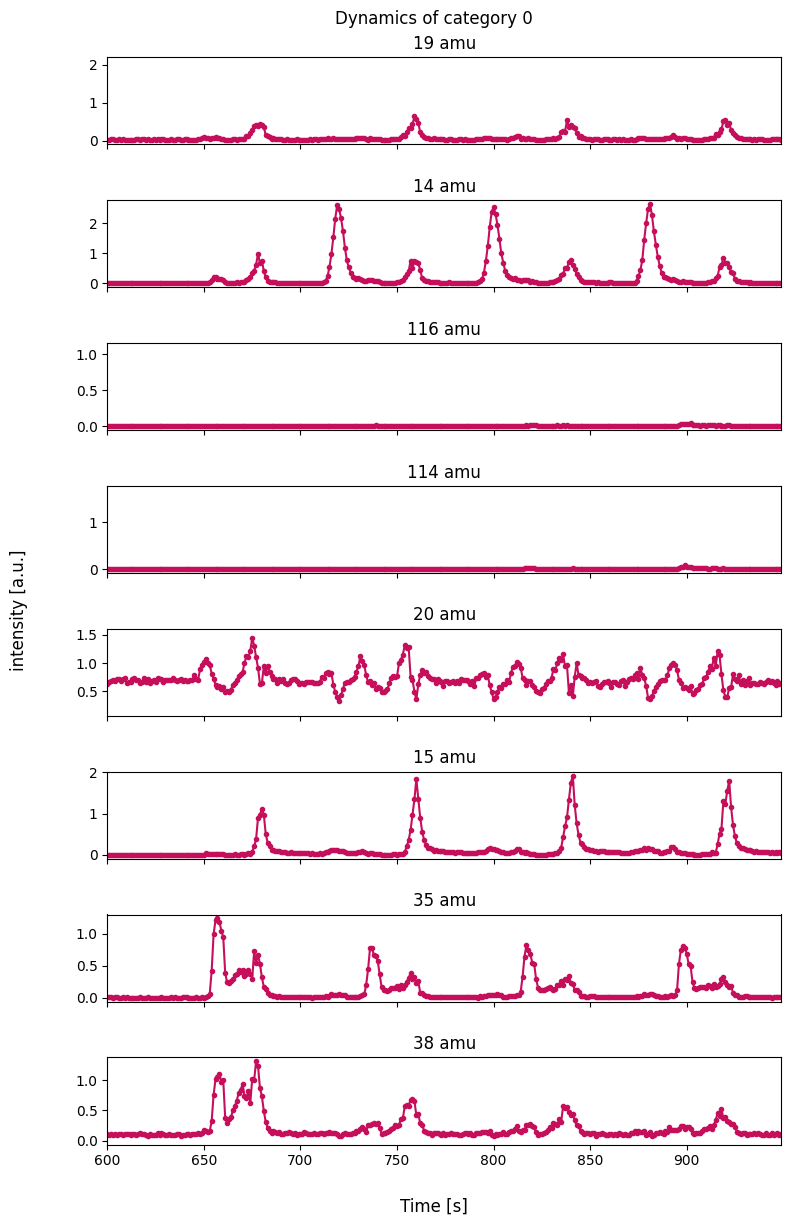

In [137]:
target_index= 4
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,12))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=color[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

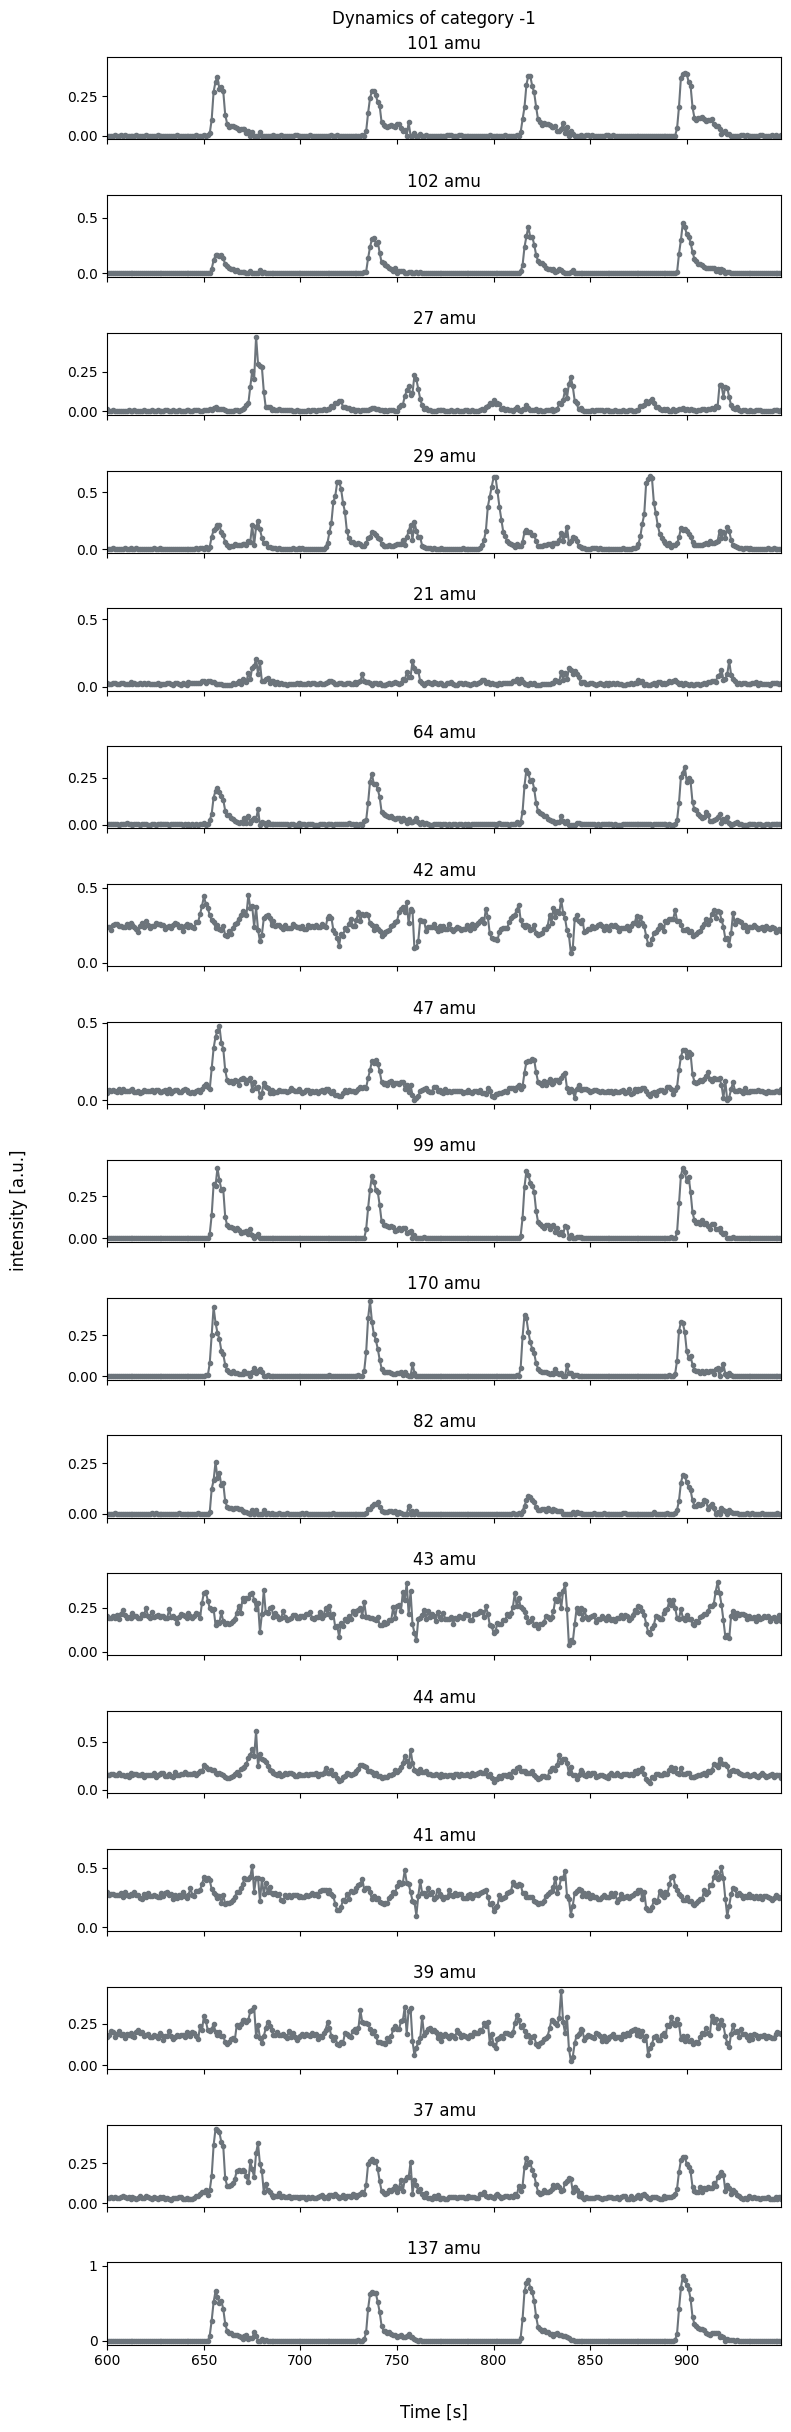

In [138]:
target_index= 5
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,24))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color=color[target_index])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

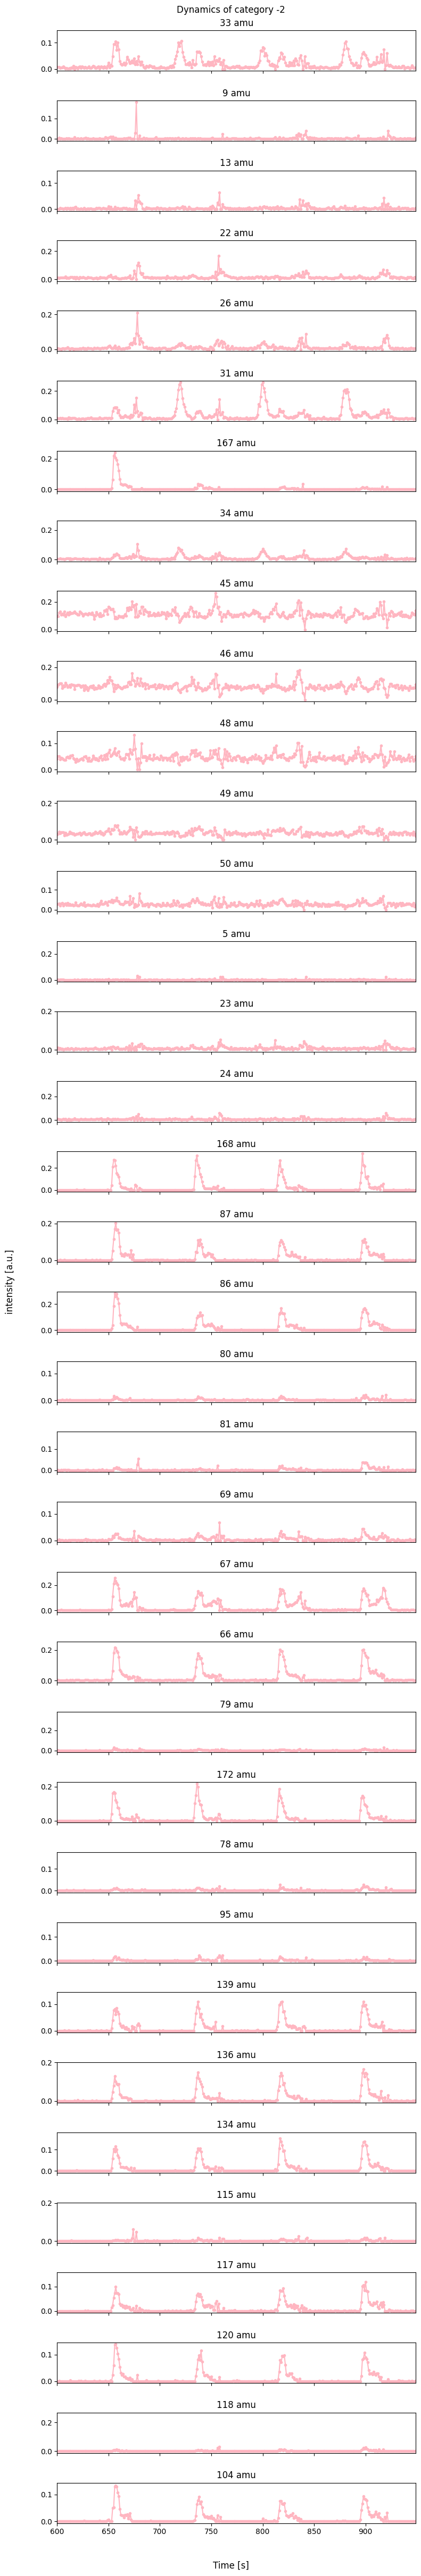

In [140]:
target_index= 6
category_to_plot = category_mass[target_index]
fig, axs = plt.subplots(len(category_to_plot), 1, sharex=True, figsize=(8,48))
fig.tight_layout(pad=3)
for idx, val in enumerate(category_to_plot):
    axs[idx].plot(df.loc[:,val],'.-',color='lightpink')
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    axs[idx].set_title(f'{val} amu') # f'{cate_label[idx]} ({val})'
    

fig.supxlabel('Time [s]', y=-0.005)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle(f'Dynamics of category {4-target_index}', y=1)
plt.show()

fig.savefig(f'image/dynamics_major_percentage_cate{4-target_index}.png', bbox_inches='tight')

In [110]:
# in order to apply a clustering algorithm, group the values by category 
category_df = []
for i in category_mass:
    temp = []
    for j in i:
        temp.append((df.loc[:,j]).to_frame())
    if len(temp) >1: # concat
        category_df.append(pd.concat(temp, axis=1))
    else:
        category_df.append((df.loc[:,i]))
print(len(category_df))

# clustering <- normalize intensity first
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# scaling on each category
category_df_scaled = []
for df_elem in category_df:
    mm = MinMaxScaler()
    df_elem_scaled = mm.fit_transform(df_elem.to_numpy())
    df_elem_scaled = pd.DataFrame(df_elem_scaled, columns=df_elem.columns)
    category_df_scaled.append(df_elem_scaled)

category_df_scaled[2]

9


,98,63
0,0.000000,0.000003
1,0.000000,0.000003
2,0.000000,0.000003
3,0.000000,0.000003
4,0.000000,0.000003
...,...,...
7595,0.000044,0.000274
7596,0.000118,0.000116
7597,0.000000,0.000155
7598,0.000124,0.000226


In [111]:
# combine the dfs
scaled_df = pd.concat(category_df_scaled, axis=1)
scaled_df.head()

,40,28,18,17,16,98,63,65,135,133,...,250,267,265,264,269,255,254,253,252,251
0,0.001904,0.066295,0.963671,0.367962,0.100944,0.0,0.000003,0.000013,0.0,0.0,...,0.005333,0.014717,0.023808,0.000793,0.00591,0.000688,0.004017,0.000408,0.013917,0.000785
1,0.002469,0.074697,0.959260,0.384387,0.071449,0.0,0.000003,0.000013,0.0,0.0,...,0.005333,0.014717,0.023808,0.000793,0.00591,0.000688,0.004017,0.000408,0.013917,0.000785
2,0.001367,0.064695,0.949585,0.393957,0.050155,0.0,0.000003,0.000013,0.0,0.0,...,0.005333,0.014717,0.023808,0.000793,0.00591,0.000688,0.004017,0.000408,0.013917,0.000785
3,0.003233,0.068179,0.948839,0.417034,0.056869,0.0,0.000003,0.000013,0.0,0.0,...,0.005333,0.014717,0.023808,0.000793,0.00591,0.000688,0.004017,0.000408,0.013917,0.000785
4,0.000680,0.091547,0.917760,0.422495,0.065476,0.0,0.000003,0.000013,0.0,0.0,...,0.005333,0.014717,0.023808,0.000793,0.00591,0.000688,0.004017,0.000408,0.013917,0.000785


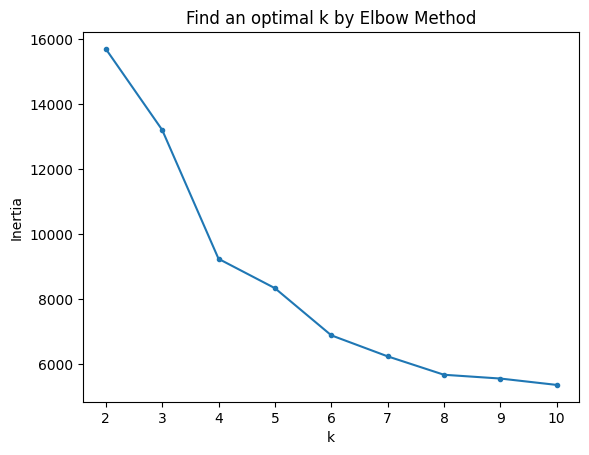

In [112]:
# find the best k for K-Means alg
inertia = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,11),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

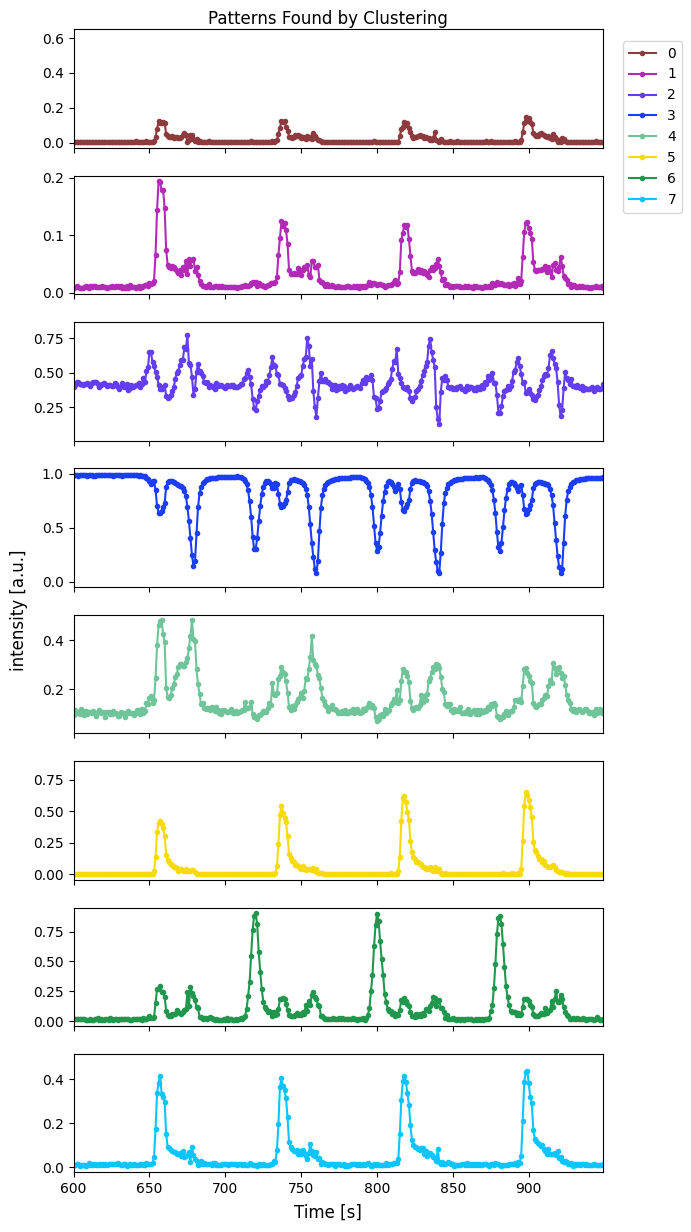

In [150]:
# set k
k = 8
km = KMeans(n_clusters=k, random_state=42)
km.fit(scaled_df.T)

# colors
label_color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(k)]

# draw cluster centers
fig, axs = plt.subplots(k,1, sharex=True, figsize=(6,12))
fig.tight_layout(pad=1)
for idx, val in enumerate(km.cluster_centers_):
    axs[idx].plot(val,'.-',color=label_color[idx])
    # axs[idx].set_xlabel('time [s]')
    axs[idx].set_xlim(600,df.index[-1]//8)
    # axs[idx].set_ylabel('intensity [a.u.]')
    # axs[idx].set_title(f'{cate_label[idx]} ({val}) | category {km.labels_}') # amu
    
fig.supxlabel('Time [s]', y=-0.01)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.suptitle('Patterns Found by Clustering', y=1)
fig.legend(set(km.labels_), bbox_to_anchor=(0.98, 0.98), loc='upper left')
plt.show()

In [151]:
fig.savefig('image/clustering_percentage.png', bbox_inches='tight')

In [168]:
kmlabel = []
for i in range(k):
    kmlabel.append(scaled_df.T[km.labels_==i].index.values.tolist())

In [169]:
with open("file/kmlabel.txt", 'w') as output:
    for i in range(len(kmlabel)):
        for j in kmlabel[i]:
            output.write(str(j) + '\t')
        output.write(str(i) + '\n')

In [177]:
# table example from GeeksForGeeks
from tabulate import tabulate

# assign data
mydata = []
for i in range(len(kmlabel)):
    mydata.append(kmlabel[i][:5])

# display table
print(tabulate(mydata, headers=['Pattern','M','a','s','s','[amu]'], tablefmt="grid", showindex="always"))

+-----------+-----+-----+-----+-----+---------+
|   Pattern |   M |   a |   s |   s |   [amu] |
+===========+=====+=====+=====+=====+=========+
|         0 | 116 | 114 |  80 |  81 |      79 |
+-----------+-----+-----+-----+-----+---------+
|         1 |  18 |  32 |  30 |  85 |      19 |
+-----------+-----+-----+-----+-----+---------+
|         2 |  20 |  42 |  43 |  41 |      39 |
+-----------+-----+-----+-----+-----+---------+
|         3 |  40 |     |     |     |         |
+-----------+-----+-----+-----+-----+---------+
|         4 |  17 |  16 |  36 |  35 |      38 |
+-----------+-----+-----+-----+-----+---------+
|         5 |  98 |  63 |  65 | 135 |     133 |
+-----------+-----+-----+-----+-----+---------+
|         6 |  28 |  14 |  29 |  33 |      31 |
+-----------+-----+-----+-----+-----+---------+
|         7 | 101 | 170 | 168 |  67 |     172 |
+-----------+-----+-----+-----+-----+---------+
